In [10]:
import pandas as pd
import os


# %matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import datetime as datetime

In [20]:
root_path=r'D:\JupyterCode\MyQuantFinProject\Data'
file_name='Crypto_vs_WorldFund_MarchApril22.csv'
today=datetime.datetime.today()

from_month_str='2022-04-01'
to_month_str= today.strftime("%Y-%m-%d")

print(from_month_str)
print(to_month_str)

2022-04-01
2022-05-04


In [21]:
col_corr=['close']
col_key='Ticker'
col_datetime='Date/Time'

In [22]:
dfAll=pd.read_csv(f'{root_path}\\{file_name}',index_col=col_datetime,parse_dates=[col_datetime],dayfirst=True)


df=dfAll.loc[from_month_str:to_month_str,:]

df=df[[col_key]+col_corr]


In [23]:
df.head()

,Ticker,close
Date/Time,,
2022-04-01,ACWI,100.43
2022-04-04,ACWI,101.40
2022-04-05,ACWI,99.95
2022-04-06,ACWI,98.80
2022-04-07,ACWI,99.01


In [24]:
df.tail()

,Ticker,close
Date/Time,,
2022-04-25,SPY,428.51
2022-04-26,SPY,416.10
2022-04-27,SPY,417.27
2022-04-28,SPY,427.81
2022-04-29,SPY,412.00


In [25]:
list_symbol=df[col_key].unique().tolist()
print(list_symbol)

['ACWI', 'BNB-USD', 'QQQ', 'ETH-USD', 'BTC-USD', 'SPY']


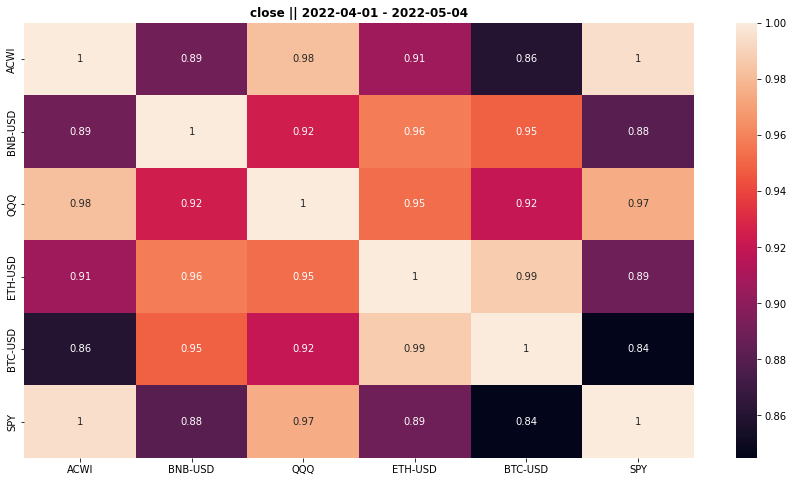

In [26]:


for col in col_corr:  
    pd_corr=pd.DataFrame()
    for symbol in list_symbol:

      df_by_symbol=df.query(f'{col_key}==@symbol')[[col]]
      df_by_symbol=df_by_symbol.rename(columns={col:symbol})   
      #print(df_by_symbol)  
      pd_corr=pd.concat([pd_corr, df_by_symbol], axis=1)
        
    corrMatrix = pd_corr.corr()
    plt.figure(figsize = (15,8))
    plt.title(f'{col} || {from_month_str} - {to_month_str}',fontweight ="bold")
    
    sn.heatmap(corrMatrix, annot=True)
    plt.show()
    
#     print(pd_corr)